##SDG 13: Climate Action:
**The Energy Consumption Optimization model for carbon reduction optimizes energy use in buildings and industries, leading to cost savings and lower carbon emissions. It helps utility companies predict energy demand and integrate renewable sources, reducing reliance on fossil fuels. Government agencies can use the model to inform energy policies, while businesses can enhance their sustainability efforts. Overall, this model is a crucial tool for promoting energy efficiency and combating climate change across various sectors.**



In [5]:
import pandas as pd
import numpy as np

##Importing the dataset

In [6]:
# Load the combined dataset
data = pd.read_csv('combined_energy_data.csv')

In [ ]:
print(data.head())# Display the first few rows of the dataset

In [ ]:
print(data.info())# Display basic information about the dataset

In [ ]:
print(data.describe())# Display basic statistics

##Data Preprocessing

In [10]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Date                       0
Residential_Consumption    0
Commercial_Consumption     0
Industrial_Consumption     0
Solar_Production           0
Wind_Production            0
Coal_Emissions             0
Natural_Gas_Emissions      0
Oil_Emissions              0
dtype: int64


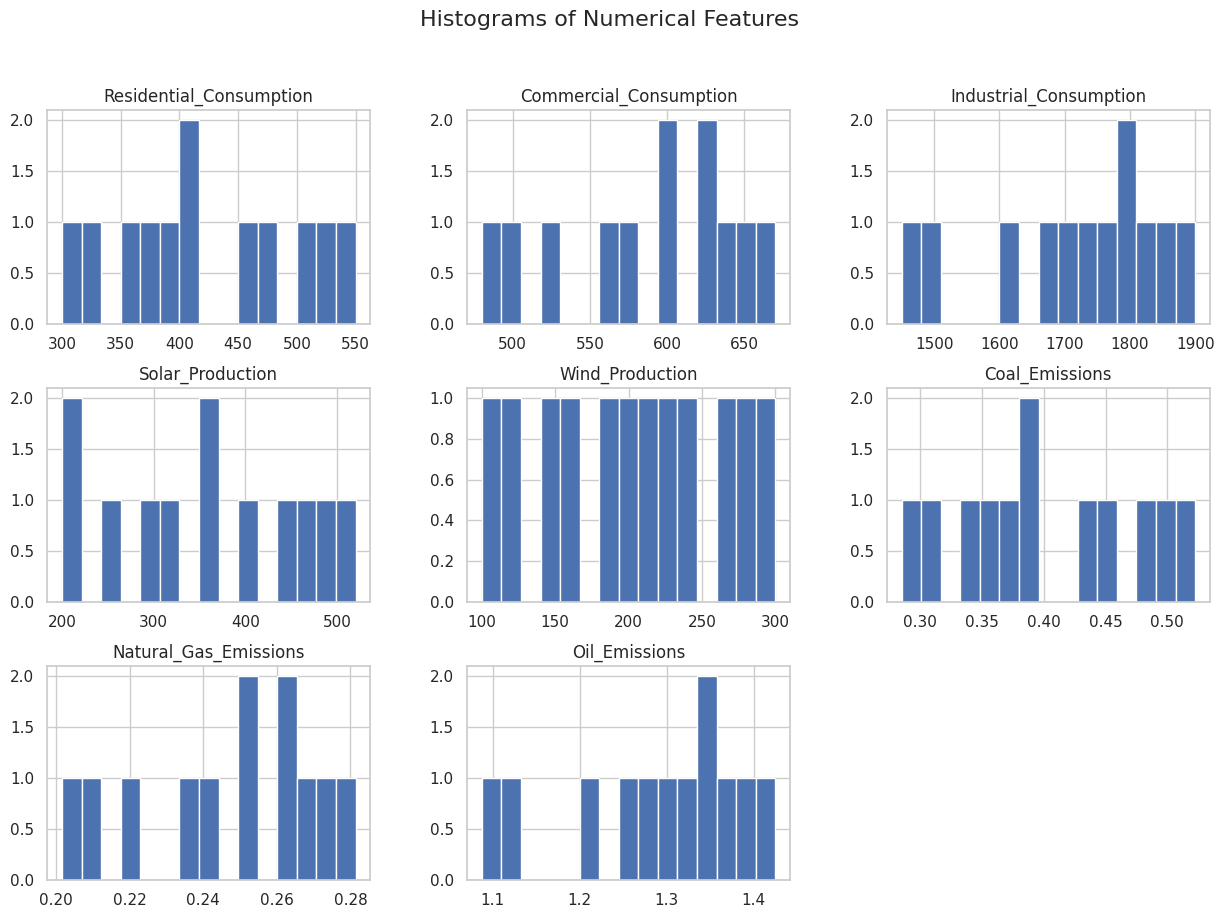

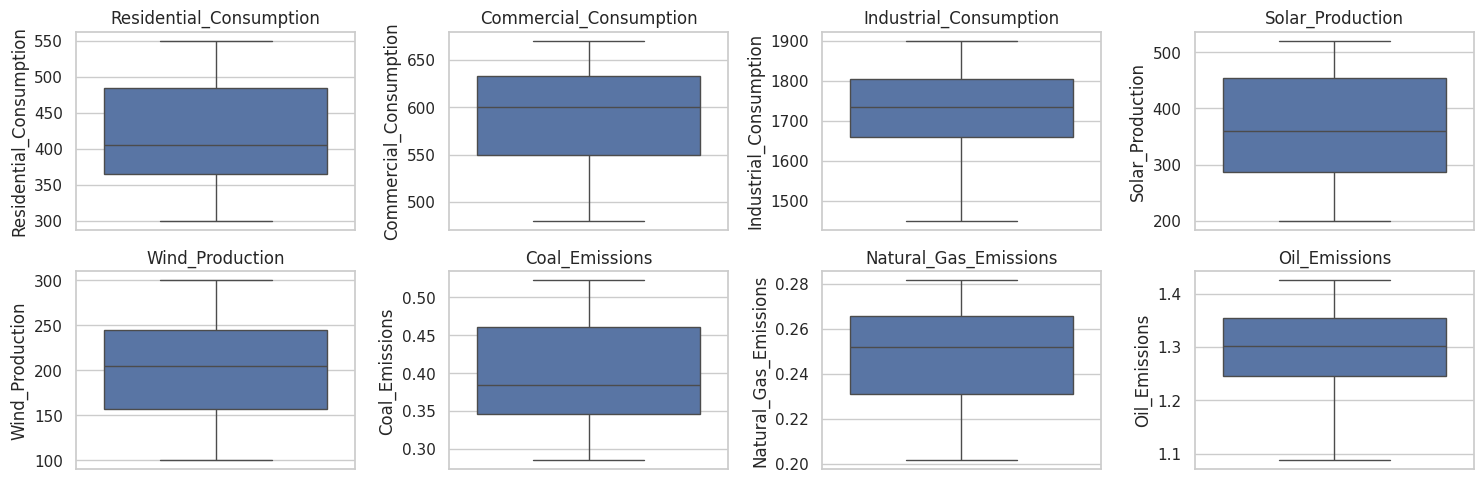

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Plot distributions of numerical features
data.hist(bins=15, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.show()

# Boxplots to identify outliers
plt.figure(figsize=(15, 5))
for i, column in enumerate(data.columns[1:], 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=data[column])
    plt.title(column)

plt.tight_layout()
plt.show()


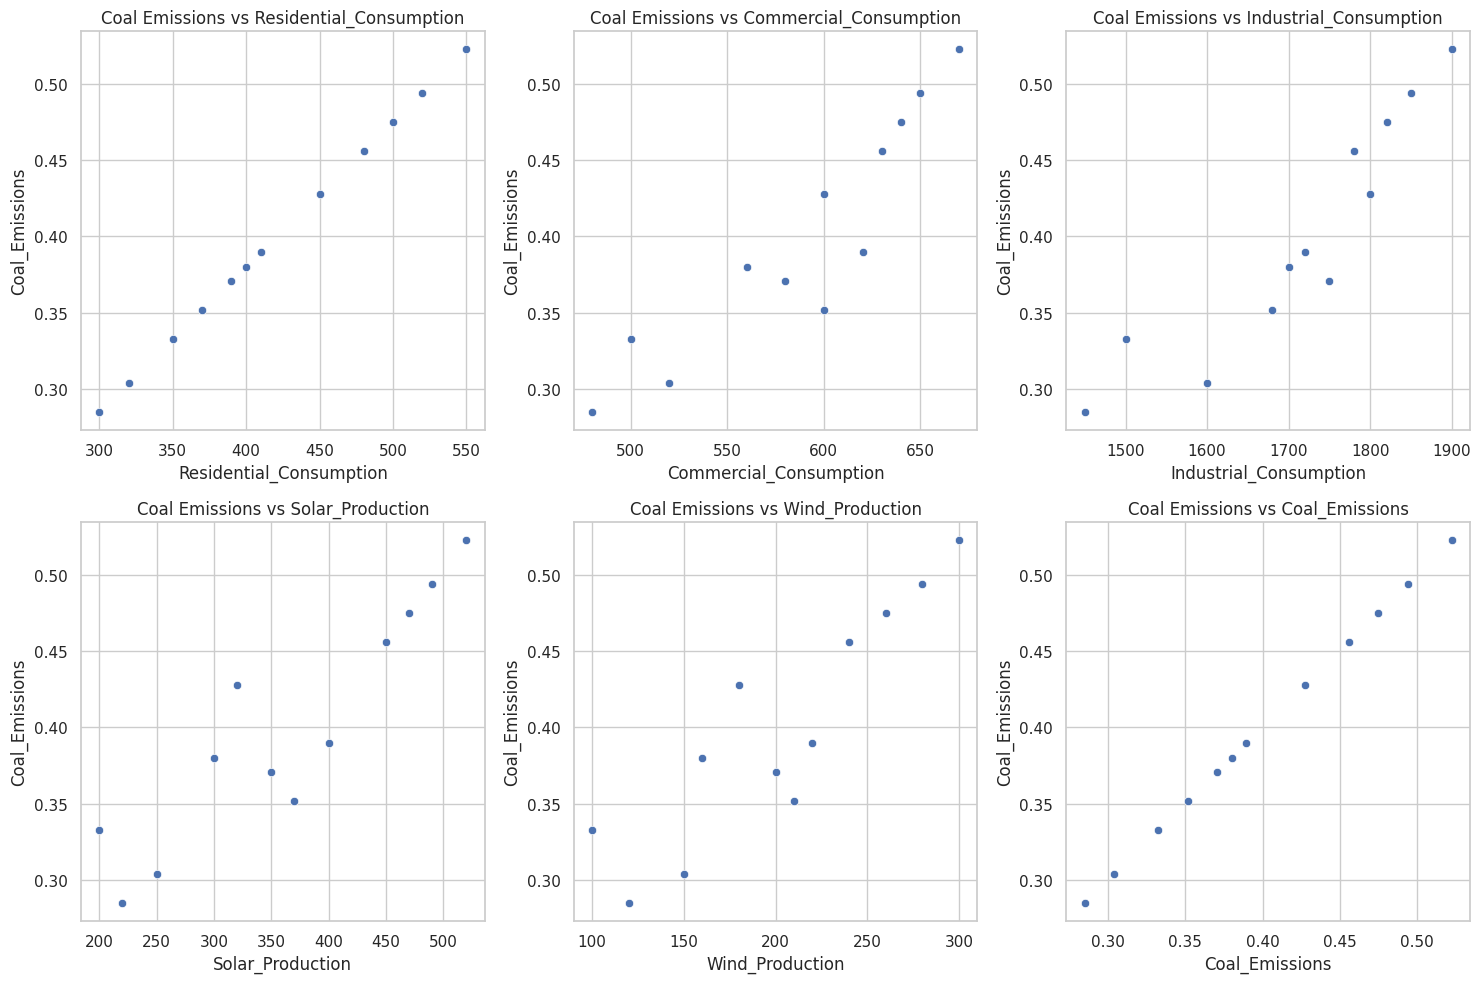

In [12]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(data.columns[1:7], 1):  # Only take the first 6 columns
    plt.subplot(2, 3, i)
    sns.scatterplot(x=data[column], y=data['Coal_Emissions'])
    plt.title(f'Coal Emissions vs {column}')
plt.tight_layout()
plt.show()


In [13]:
# Prepare data for modeling
X = data[['Residential_Consumption', 'Commercial_Consumption', 'Industrial_Consumption', 'Solar_Production', 'Wind_Production']]
y = data['Coal_Emissions']

In [14]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
from sklearn.linear_model import LinearRegression# Create a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [16]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [17]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [18]:
# Display the evaluation results
print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2:.2f}')

Mean Squared Error: 0.00
R² Score: 1.00


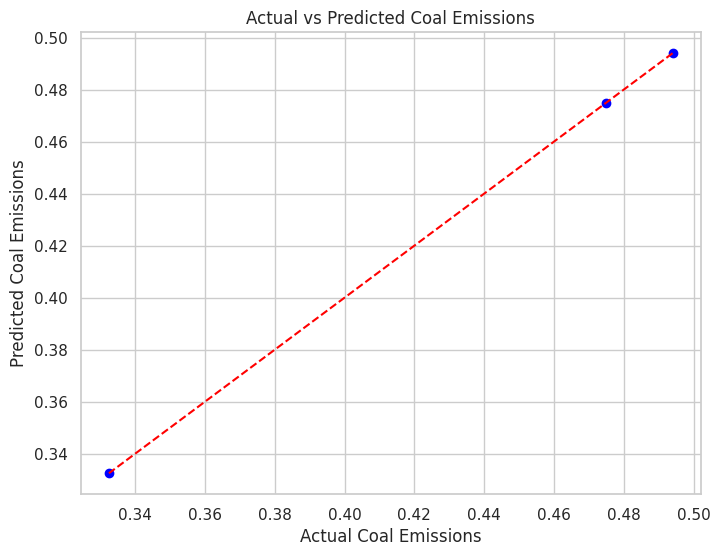

In [19]:
# Plotting the predicted vs actual emissions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot(y_test, y_test, color='red', linestyle='--')  # Line for perfect predictions
plt.xlabel('Actual Coal Emissions')
plt.ylabel('Predicted Coal Emissions')
plt.title('Actual vs Predicted Coal Emissions')
plt.show()